<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Music Album Rating Predictor </h3> </center>
<center><h4>Gabriela Compagni and Andi Joshua</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Although media review sites seek to be impartial, there will be inevitably be differences in preference based on the reviewer. This project sought to learn whether a specific type of album defines its subsequent score. Using the feature variables about a given album such as release date, format, and genre, we attempted to predict the outcome variable, the aggregated critic rating on popular music rating sites Mediacritic and Album of the Year. We were also interested in any differences between the performance of the two sites. After performing several regressions on our transformed and selected features, we were able to see that Linear and Ridge regressions performed the best with the data from both sites, but low R-squared and test set scores inform our conclusion that the outcome variable cannot be reliably predicted using the features. 


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION



### Problem Statement
The topic of this project is to determine whether we can use features of an album to predict the rating of that album, and if so, if there are certain features specifically correlated with a higher rating on a certain music website.

Out of personal interest, we are looking to discover if there exists a correlation between an album's characteristics and its subsequent score. Although publications seek to be unbiased, there may be a lean that favors distinct characteristics. By looking at a dataset that includes aggregated critic scores from two different sites, we hope to be able to compare the significant features on each site to see if they are analogous or distinct.

### Significance of the Problem
The project is relevant because an album's rating often will sway people into listening to it or to avoid it altogether. This means that adverse reviews can affect an artist's bottom line. As music enthusiasts, we check a variety of sources including established music magazines like Rolling Stone, and online sites such as the ones we are exploring in this project, Metacritic and Album of the Year. It will be interesting to learn whether there is a bias towards certain characteristics of the album on a particular site, or whether it's an impartial source. This will help to determine whether it's worth taking the source's opinion with a grain of salt and perhaps reassure artists who scored poorly.

### Questions and Hypotheses
1. Is there a significant relationship between selected album features, such as release date or format, and the aggregated critic rating each album receives?
  - Null: There is not a significant relationship between selected album features and the ablum's critic review rating.
  - Alternative: There is not a significant relationship between selected album features and the ablum's critic review rating.
2. Is there a significant difference between the regression results when performed on Metacritic ratings vs. Album of the Year ratings?
  - Null: There is not a significant difference between the regression results when performed on Metacritic ratings vs. Album of the Year ratings.
  - Alternative: There is a significant difference between the regression results when performed on Metacritic ratings vs. Album of the Year ratings. 
3. What is the best regression model for predicting album scores based on given features of the album (for both Metacritic and Album of the Year)?
  - Null: k-Nearest Neighbor Regression is the best predictor for album scores based on given features, for both Metacritica and Album of the Year. 
  - Alternative: k-Nearest Neighbor Regression is not the best predictor for album scores based on given features, for both Metacritica and Album of the Year.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Our dataset was retrived from Kaggle, and can be found here:
https://www.kaggle.com/kauvinlucas/30000-albums-aggregated-review-ratings

The dataset contains 32,358 rows which each represent a single music album, either an LP or EP. The dataset has 16 columns, which all contain some kind of information about the album. Some of the columns are features of each album, such as artist, title, genre, record label and release date. The dataset also contains the aggregated critic scores from two popular music review sites, Metacritic and Album of the Year, which will be our main target variables. The dataset also has columns which provide the aggregated scores regular users on the site gave the album, and how many people left reviews. While these data points are also very interesting, we have chosen to focus on the critic scores instead, as we would expect a music critic be more consistent and less biased than an average user, and therefore give a score that is more accurate. 

### 2.2. Data Analysis


Independent Variables (feature variables):
- Release Day
- Release Month 
- Release Year
- Format (LP/EP)
- Genre
- Label
- Metacritic Reviews
- Metacritic User Score
- Metacritic User Reviews
- AOTY Critic Reviews
- AOTY User Score
- AOTY User Reviews

The number of critic reviews, user score of the album, and number of user reviews, will be specific to the site, meaning we will not include the three Metacritic-relevant features when dealing with the Album of the Year target variable, and vice versa with Album of the Year data and the Metacritic target variables. 

Dependent Variables (target variables): 
- Metacritic Score 
- AOTY Critic Score

Both of these variables represent the aggregated score an album received as a rating on their respective site.

The outcome variable we are attempting to predict will be either the Metacritic or AOTY score, utilizing the feature variables listed above. We intend to investigate whether it is possible to see correlations between specific features and the resulting score, such as a later release year correlating to a higher score, or certain genres correlating to lower ones. As the features represent some of the most commonly-discussed aspects of an album, we believe that if it is possible to predict album scores based on features, these are the best candidate features to begin with. 

This is fundamentally a supervised ML problem because we know the output variables of our data, and our data is labelled. It's subcategorized as a regression problem because we are looking for a numerical score, which is a continuous target variable, and not a categorical outcome which would indicate a classifiation problem.

For our algorithms, we have chosen to start with  five regression algorithms: Linear Regression, Ridge Regression, Lasso Regression, k-Nearest Neighbors, and Support Vector Machine (LinearSVR). We chose these as they are algorithms we are most familiar with, as well as being popular regressors which work with a wide variety of data. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling



#### Data Cleaning
First, we import the dataset from our GitHub repository and save it to a dataframe. We also get rid of columns we know won't be be able to be meaningfully represented in continuous form, which are artist and title.  We can then drop any rows with NaN values, since we don't want any albums with missing datapoints in columns we'll be utilizing.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/gcompagni/DS3000FinalProject/main/ratings.csv"   
full_df = pd.read_csv(url)
df = full_df.drop(['Artist', 'Title'], axis=1)
df = df.dropna()
df

,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,March,3.0,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,February,17.0,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,January,20.0,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,January,27.0,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,January,20.0,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32080,October,13.0,2017,LP,Love,Pop Rock,81.0,6.0,5.6,29.0,80,4,76,4
32141,May,12.0,2012,LP,Razor & Tie,Metalcore,81.0,6.0,8.8,4.0,75,2,70,1
32203,June,25.0,2013,LP,Monkeytown,Electro House,73.0,5.0,8.4,7.0,74,4,71,2
32266,September,24.0,2002,LP,!K7,Microhouse,60.0,10.0,7.0,4.0,70,2,90,1


#### Data Wrangling
Then we can separate out our target variables, the two ratings, as well as our features, which are the album metadata.

In [ ]:
mc_target = df['Metacritic Score']
aoty_target = df['AOTY Critic Score']
features = df.drop(['Metacritic Score', 'AOTY Critic Score'], axis=1)
features.head()

,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,March,3.0,2009,LP,ANTI-,Alt-Country,31.0,8.7,31.0,25,78,55
1,February,17.0,2009,LP,Thirty Tigers,Country Rock,14.0,8.4,7.0,11,73,8
2,January,20.0,2009,LP,Domino,Psychedelic Pop,36.0,8.5,619.0,30,87,1335
3,January,27.0,2009,LP,Columbia Records,Rock,29.0,7.9,101.0,23,66,38
4,January,20.0,2009,LP,Fat Possum,Singer-Songwriter,29.0,8.7,47.0,24,78,44


#### Pre-Processing
Here we define functions to pre-process our variables, which we will use later.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# scale the variables using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)
    return X_train_scaled, X_test_scaled

#split the data into training and testing sets using the percentage-split method
def split_train_test(features, target):
    splits = train_test_split(features, target, random_state=3000)
    return splits

#### Feature Extraction
As can be seen in the sample of the features dataframe, we have quite a few categorical variables that need to be transformed into continuous ones before they can be used in regression. We do this with a mix of methods as noted in the cells below.

In [ ]:
# transforming categorical variables with mapping
# transform the Month column from strings to their corresponding integers 1-12
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 
          'September':9, 'October':10, 'November':11, 'December':12}
features['Release Month'] = features['Release Month'].map(months)

# transform the Format column into 0/1 where 0 is EP and 1 is LP
fmt = {'LP':1, 'EP': 0}
features["Format"] = features['Format'].map(fmt)

#see our changes
features.head()

,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,3,3.0,2009,1,ANTI-,Alt-Country,31.0,8.7,31.0,25,78,55
1,2,17.0,2009,1,Thirty Tigers,Country Rock,14.0,8.4,7.0,11,73,8
2,1,20.0,2009,1,Domino,Psychedelic Pop,36.0,8.5,619.0,30,87,1335
3,1,27.0,2009,1,Columbia Records,Rock,29.0,7.9,101.0,23,66,38
4,1,20.0,2009,1,Fat Possum,Singer-Songwriter,29.0,8.7,47.0,24,78,44


In [ ]:
# using One Hot Encoding for Label and Genre
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
l_encoded_df = encoder.fit_transform(features['Label'].values.reshape(-1,1))
label_df = pd.DataFrame(l_encoded_df, columns = encoder.get_feature_names())
g_encoded_df = encoder.fit_transform(features['Genre'].values.reshape(-1,1))
genre_df = pd.DataFrame(g_encoded_df, columns = encoder.get_feature_names())

# check how many unique features each has generated
print("Number of unique record labels: {}".format(label_df.shape[1]))
print("Number of unique genres: {}".format(genre_df.shape[1]))

Number of unique record labels: 2405
Number of unique genres: 232


As we can see, the number of created features for both label and genre are extremely high, and with this number of features, it is likely we would end up with an overfitting issue. Therefore, we will not include them in the features we use in the final models.

In [ ]:
# now we must make our final features dataframe, dropping Label and Genre
features_eng = features.drop(['Genre', 'Label'], axis = 1)

# we will also divide into two sets of features, one for Metacritic which doesn't include the AOTY-relevant features, and vice versa
mc_features = features_eng.drop(['AOTY Critic Reviews', 'AOTY User Score', 'AOTY User Reviews'], axis = 1)
aoty_features = features_eng.drop(['Metacritic Reviews', 'Metacritic User Score', 'Metacritic User Reviews'], axis = 1)

#example display for features
mc_features.head()

,Release Month,Release Day,Release Year,Format,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews
0,3,3.0,2009,1,31.0,8.7,31.0
1,2,17.0,2009,1,14.0,8.4,7.0
2,1,20.0,2009,1,36.0,8.5,619.0
3,1,27.0,2009,1,29.0,7.9,101.0
4,1,20.0,2009,1,29.0,8.7,47.0


#### Feature Selection
Now that we have our features transformed, we can select the 3 most relevant features using iterative feature selection, and examine whether they are the same for each target variable.

In [ ]:
# metacritic target pre-processing
X_train_mc, X_test_mc, y_train_mc, y_test_mc = split_train_test(mc_features, mc_target)
X_train_scaled_mc, X_test_scaled_mc = preprocessor(X_train_mc, X_test_mc)

# album of the year pre-processing
X_train_aoty, X_test_aoty, y_train_aoty, y_test_aoty = split_train_test(aoty_features, aoty_target)
X_train_scaled_aoty, X_test_scaled_aoty = preprocessor(X_train_aoty, X_test_aoty)

# example of a scaled training set for metacritic
X_train_scaled_mc

array([[1.00000000e+00, 3.33333333e-02, 8.86792453e-01, ...,
        4.25531915e-01, 6.50000000e-01, 2.92179113e-03],
       [3.63636364e-01, 5.66666667e-01, 8.11320755e-01, ...,
        2.12765957e-01, 6.25000000e-01, 2.03845893e-04],
       [2.72727273e-01, 2.66666667e-01, 8.67924528e-01, ...,
        7.02127660e-01, 8.87500000e-01, 3.66922607e-03],
       ...,
       [3.63636364e-01, 1.00000000e-01, 8.11320755e-01, ...,
        3.61702128e-01, 9.12500000e-01, 3.39743154e-04],
       [3.63636364e-01, 7.00000000e-01, 7.54716981e-01, ...,
        2.12765957e-01, 8.25000000e-01, 7.47434939e-04],
       [6.36363636e-01, 9.33333333e-01, 7.16981132e-01, ...,
        1.27659574e-01, 3.87500000e-01, 4.75640416e-04]])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# define a function to complete the feature selection so we can call it with both target variables
def RFE_feature_selection(features, x_train, x_test, y_train):
    feature_selection = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
    feature_selection.fit(x_train, y_train)
    X_train_selected = feature_selection.transform(x_train)
    X_test_selected = feature_selection.transform(x_test)
    selected_features = [feature for feature, status in zip(features, feature_selection.get_support()) if status == True]
    print('Selected features:')
    for feature in selected_features:
        print('\t' + feature)
    return X_train_selected, X_test_selected, selected_features

In [ ]:
# select features for the metacritic data
print("METACRITIC\n--------------")
X_train_selected_mc, X_test_selected_mc, selected_features_mc = RFE_feature_selection(mc_features, X_train_scaled_mc, X_test_scaled_mc, y_train_mc)

# select features for the aoty data
print("ALBUM OF THE YEAR\n--------------")
X_train_selected_aoty, X_test_selected_aoty, selected_features_aoty = RFE_feature_selection(aoty_features, X_train_scaled_aoty, X_test_scaled_aoty, y_train_aoty)

METACRITIC
--------------
Selected features:
	Release Year
	Metacritic User Score
	Metacritic User Reviews
ALBUM OF THE YEAR
--------------
Selected features:
	Release Year
	AOTY User Score
	AOTY User Reviews


We can observe that the selected features are analogous for both sets, with the release year, user score, and number of user reviews appearing on both lists. This indicates some consistency between the two sites on how they rate any given album.

### 3.2. Data Exploration



In [ ]:
# enable in-line rendering
%matplotlib inline

In [ ]:
print(selected_features_mc)

['Release Year', 'Metacritic User Score', 'Metacritic User Reviews']


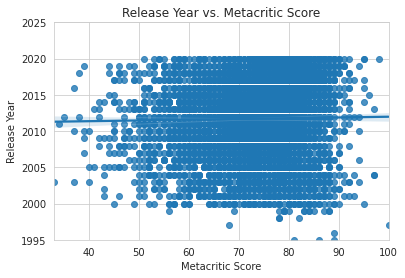

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plotreg(dataframe, site):
  sns.regplot(data=dataframe, x=site, y='Release Year').set_title("Release Year vs. " + site)
  plt.ylim(1995, 2025)
  plt.show()

plotreg(df, "Metacritic Score")

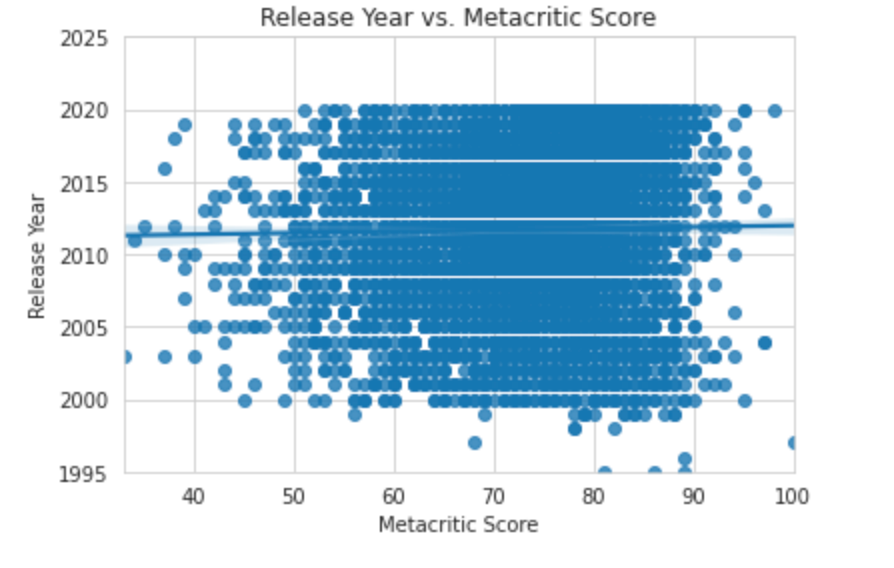


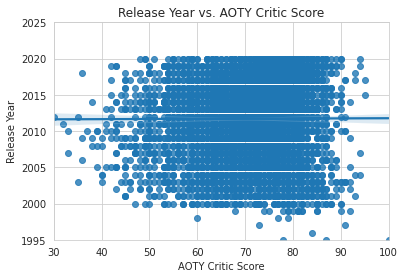

In [ ]:
plotreg(df, "AOTY Critic Score")

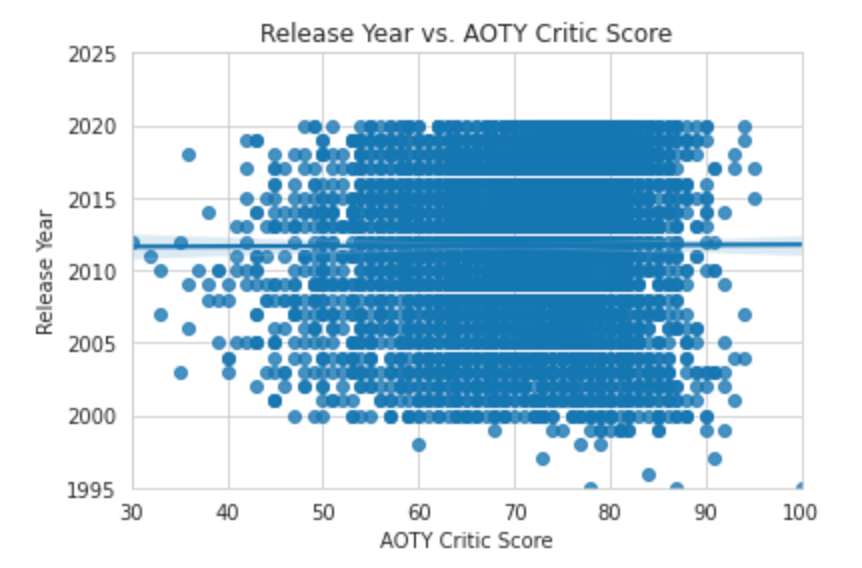

As we can see, there doesn't seem to be a strong correlation betweeen release date on either of the two sites. However, we can then look at the correlation for the other selected features, the user score, and the number of user reviews left on each site.

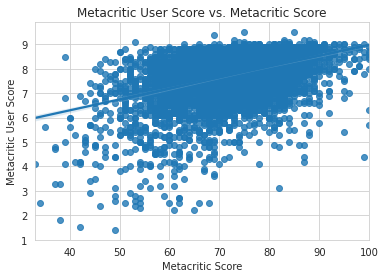

In [ ]:
def plotreg2(dataframe, site, feature):
  sns.regplot(data=dataframe, x=site, y=feature).set_title(feature + " vs. " + site)
  plt.show

plotreg2(df, "Metacritic Score", "Metacritic User Score")

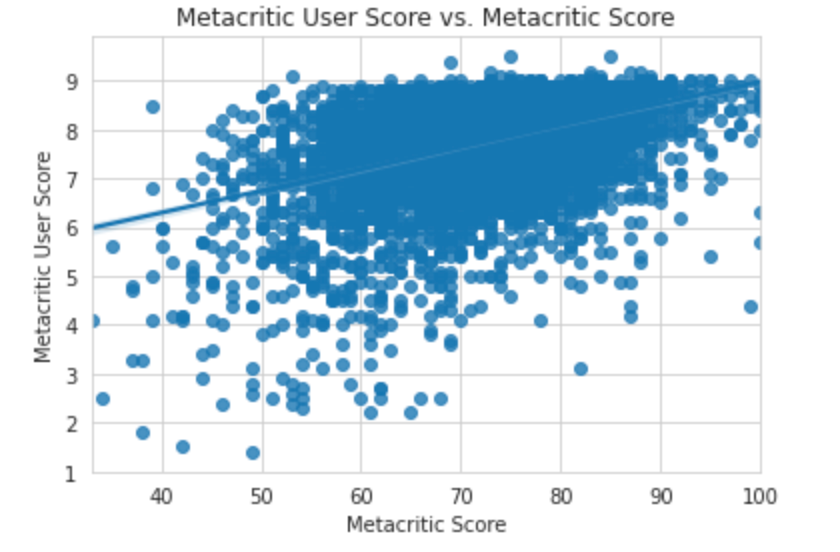

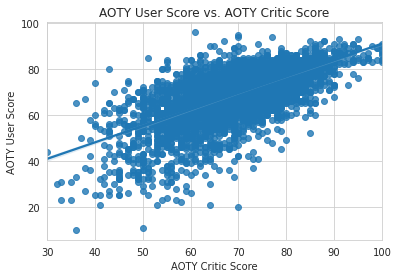

In [ ]:
plotreg2(df, "AOTY Critic Score", "AOTY User Score")

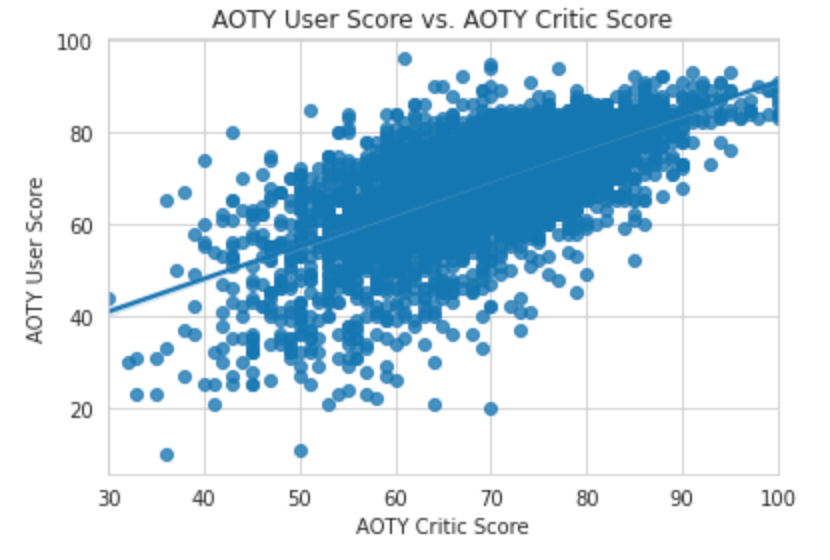

Looking at these two graphs, there seems to be a slight positive correlation between the aggregated critic scores and user scores on both sites, which indicates that critics and users generally agree on ratings on both sites. Another interesting note about these graphs is that they are much less identical than the graphs from release date, indicating that the user scores differ more between sites than the critic scores do.

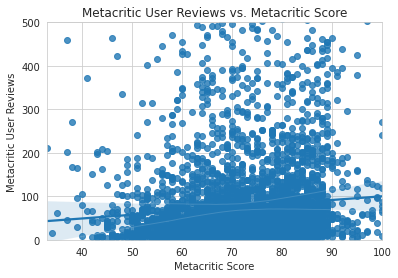

In [ ]:
def plotreg3(dataframe, site, feature):
  sns.regplot(data=dataframe, x=site, y=feature).set_title(feature + " vs. " + site)
  plt.ylim(0, 500)
  plt.show

plotreg3(df, "Metacritic Score", "Metacritic User Reviews")

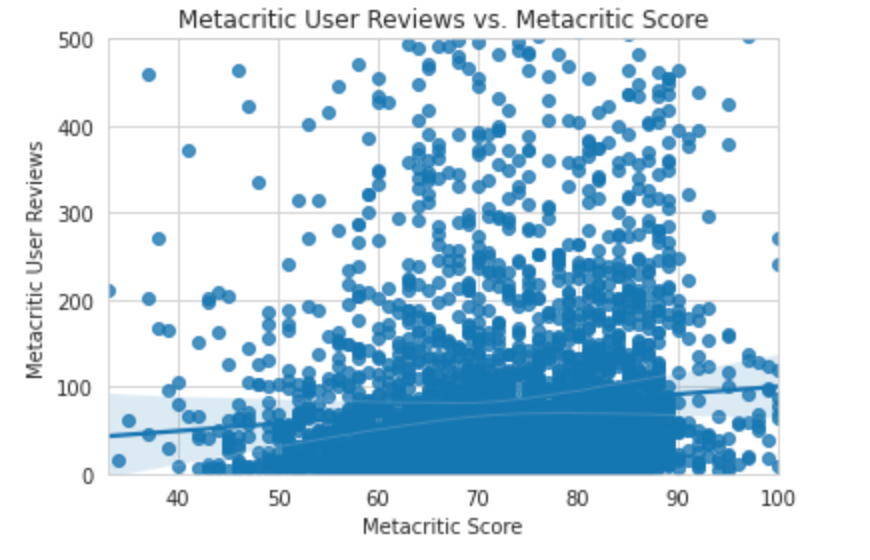

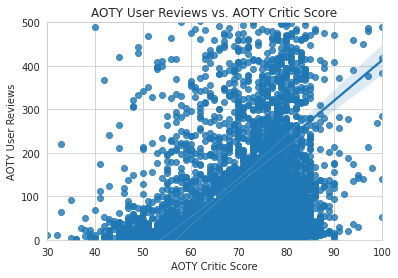

In [ ]:
plotreg3(df, "AOTY Critic Score", "AOTY User Reviews")

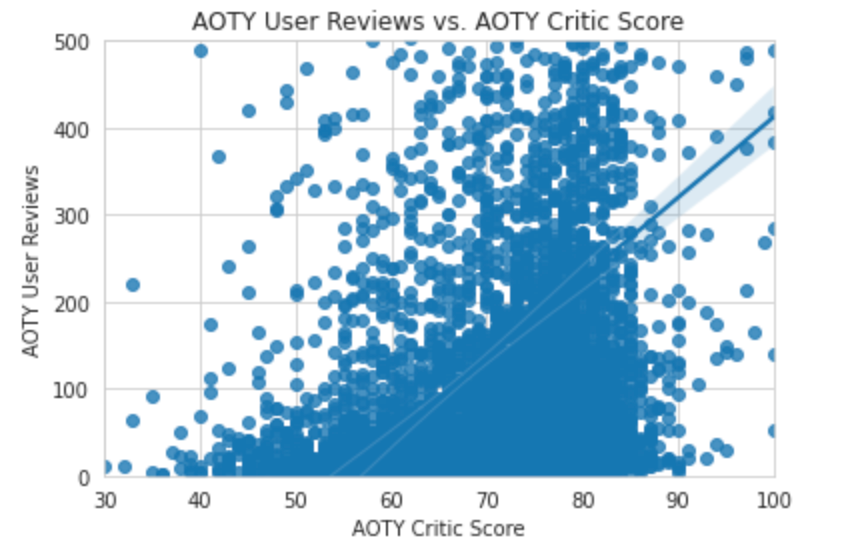

Looking at the graphs for the third selected feature, the user reviews, there seems to be no correlation on the Metacritic side, but on Album of the Year, there seems to be a slight positive correlation between the number of users who reviewed an album and the critic's score of the album. This could indicate that Album of the Year is more likely to give higher ratings to albums that people talk about more. The difference between the two graphs is again interesting, since AOTY album ratings seem to be correlated with a feature that Metacritic ratings are not.

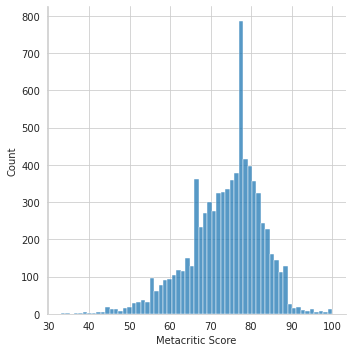

In [ ]:
def plothisto(dataframe, site):
    sns.displot(data=dataframe, x=site)
    plt.show()

plothisto(df, "Metacritic Score")

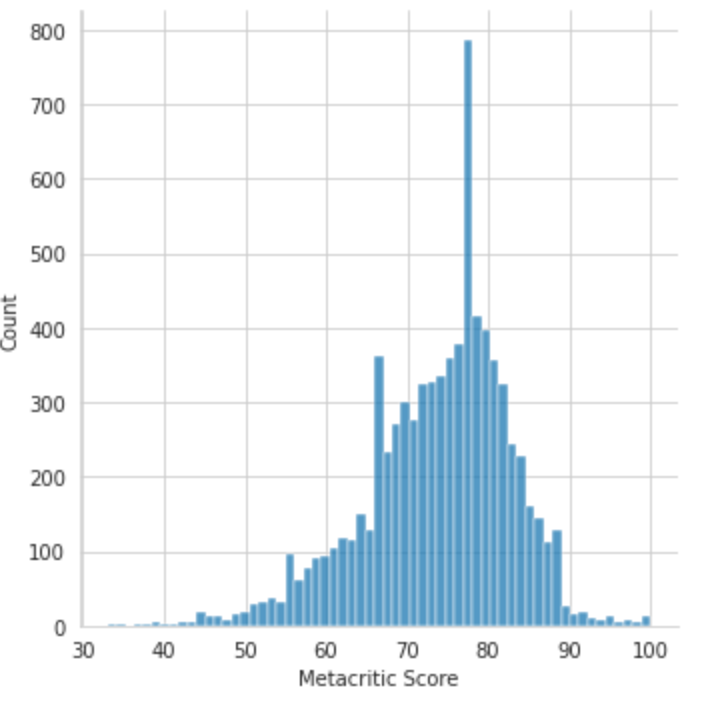

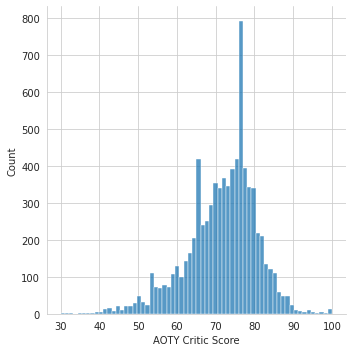

In [ ]:
plothisto(df, "AOTY Critic Score")

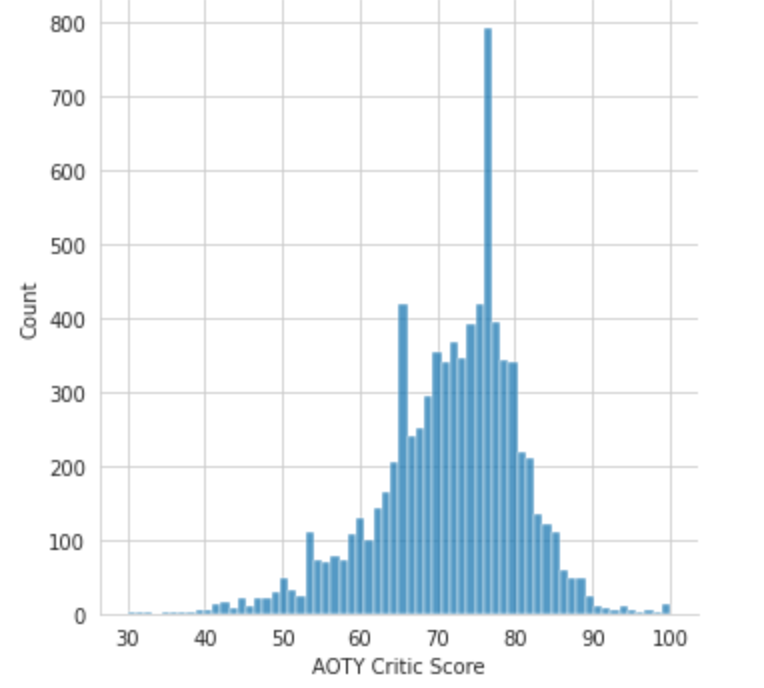

The final visualizations to examine are simple histograms of the score distributions on each site. The fact that they appear nearly identical shows us that an album has an equal chance between both sites of being given a certain rating. However, the differences in the earlier regression plots show that different features may be correlated more strongly to the scores on one site. Even though the end result (the rating itself), may be similar, testing these different features shows us that the sites have different influencing factors on these ratings.

### 3.3. Model Construction


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score

# define estimators dictionary
estimators = {'Linear Regression': LinearRegression(),'Ridge': Ridge(), 'Lasso': Lasso(),
              'k-Nearest Neighbor': KNeighborsRegressor(), 'Support Vector Machine':  LinearSVR(max_iter=1000000)}

# function to run several regression algorithms, as defined in the estimators dictionary above
def run_models(df, x_train, x_test, ytrain, ytest):    
  for estimator_name, estimator_object in estimators.items():
    model = estimator_object.fit(X=x_train, y=ytrain)
    #show r2 score for each estimator
    print('\n\t'+estimator_name+':')
    print('\tR-squared value for training set: ', r2_score(ytrain, model.predict(x_train)))
    print('\tR-squared value for testing set: ', r2_score(ytest, model.predict(x_test)))
  return 'Done'

In [ ]:
print('Results with All Features:\n------------------------')

#test metacritic with all features
print('Metacritic:\n------------------------')
run_models(df, X_train_scaled_mc, X_test_scaled_mc, y_train_mc, y_test_mc)
#test aoty with all features
print('\n')
print('Album of the Year\n------------------------')
run_models(df, X_train_scaled_aoty, X_test_scaled_aoty, y_train_aoty, y_test_aoty)

print('\nResults with Selected Features:\n------------------------')

#test metacritic with selected features
print('Metacritic:\n------------------------')
run_models(df, X_train_selected_mc, X_test_selected_mc, y_train_mc, y_test_mc)
#test aoty with selected features
print('\n')
print('Album of the Year\n------------------------')
run_models(df, X_train_selected_aoty, X_test_selected_aoty, y_train_aoty, y_test_aoty)


Results with All Features:
------------------------
Metacritic:
------------------------

	Linear Regression:
	R-squared value for training set:  0.20573981042240264
	R-squared value for testing set:  0.22195659477613972

	Ridge:
	R-squared value for training set:  0.2056864562966364
	R-squared value for testing set:  0.2217033073871506

	Lasso:
	R-squared value for training set:  0.0
	R-squared value for testing set:  -0.0005973256064812915

	k-Nearest Neighbor:
	R-squared value for training set:  0.4484165670148995
	R-squared value for testing set:  0.1551031315903193

	Support Vector Machine:
	R-squared value for training set:  0.18646062696647137
	R-squared value for testing set:  0.20860348551628605


Album of the Year
------------------------

	Linear Regression:
	R-squared value for training set:  0.48538626458319367
	R-squared value for testing set:  0.5103747297636364

	Ridge:
	R-squared value for training set:  0.4852849783929343
	R-squared value for testing set:  0.510069178

'Done'

As we can see from the preliminary outputs above, Lasso seems to be an extremely bad fit for both sites, so we will eliminate it moving forward. We can also see that, though using the selected variables seem to improve performance somewhat, these models need some tuning, which we will do using GridSearch below.

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the param dictionaries for each 
linear_params = {'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True, False]}
ridge_params = {'alpha': [.001, .01, .1, 1, 10], 'copy_X': [True, False], 'fit_intercept': [True, False]}
knn_params = {'leaf_size': [10, 30, 50, 70, 100], 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'], 'n_neighbors': [3, 5, 7, 10]}
svm_params = {'C': [.001, .01, .1, 1, 10], 'max_iter': [10000, 100000, 1000000, 10000000], 'tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01]}

def rungrid(params, estimator, X_train, X_test, y_train, y_test): 
  grid_search = GridSearchCV(estimator, params, cv=5)
  grid_search.fit(X=X_train, y=y_train)
  print("Best parameters: ", grid_search.best_params_)
  print("Best cross-validation score: ", grid_search.best_score_)
  print("Test set score: ", grid_search.score(X_test, y_test))

In [ ]:
# tune the models with the metacritic data
print('METACRITIC SCORES\n-----------------')
print('Ridge Regression Results: \n-----------------')
rungrid(ridge_params, Ridge(), X_train_scaled_mc, X_test_scaled_mc, y_train_mc, y_test_mc)
print('\nLinear Regression Results: \n-----------------')
rungrid(linear_params, LinearRegression(), X_train_scaled_mc, X_test_scaled_mc, y_train_mc, y_test_mc)
print('\nk-Nearest Neighbor Regression Results: \n-----------------')
rungrid(knn_params, KNeighborsRegressor(), X_train_scaled_mc, X_test_scaled_mc, y_train_mc, y_test_mc)
print('\nSVM Regression Results: \n-----------------')
rungrid(svm_params, LinearSVR(), X_train_scaled_mc, X_test_scaled_mc, y_train_mc, y_test_mc)

METACRITIC SCORES
-----------------
Ridge Regression Results: 
-----------------
Best parameters:  {'alpha': 1, 'copy_X': True, 'fit_intercept': True}
Best cross-validation score:  0.2020835656228927
Test set score:  0.2217033073871506

Linear Regression Results: 
-----------------
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score:  0.20173842394094077
Test set score:  0.22195659477613972

k-Nearest Neighbor Regression Results: 
-----------------
Best parameters:  {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10}
Best cross-validation score:  0.22003976653559745
Test set score:  0.20744333187439046

SVM Regression Results: 
-----------------
Best parameters:  {'C': 10, 'max_iter': 1000000, 'tol': 0.001}
Best cross-validation score:  0.1867016977466708
Test set score:  0.21404389908272378


In [ ]:
# tune the models with the Album of the Year data
print('ALBUM OF THE YEAR SCORES\n-----------------')
print('Ridge Regression Results: \n-----------------')
rungrid(ridge_params, Ridge(), X_train_scaled_aoty, X_test_scaled_aoty, y_train_aoty, y_test_aoty)
print('\nLinear Regression Results: \n-----------------')
rungrid(linear_params, LinearRegression(), X_train_scaled_aoty, X_test_scaled_aoty, y_train_aoty, y_test_aoty)
print('\nk-Nearest Neighbor Regression Results: \n-----------------')
rungrid(knn_params, KNeighborsRegressor(), X_train_scaled_aoty, X_test_scaled_aoty, y_train_aoty, y_test_aoty)
print('\nSVM Regression Results: \n-----------------')
rungrid(svm_params, LinearSVR(), X_train_scaled_aoty, X_test_scaled_aoty, y_train_aoty, y_test_aoty)

ALBUM OF THE YEAR SCORES
-----------------
Ridge Regression Results: 
-----------------
Best parameters:  {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True}
Best cross-validation score:  0.48308306521984024
Test set score:  0.5103529713538193

Linear Regression Results: 
-----------------
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score:  0.48307693523098194
Test set score:  0.5103747297636364

k-Nearest Neighbor Regression Results: 
-----------------
Best parameters:  {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10}
Best cross-validation score:  0.46169647251122525
Test set score:  0.47507550833398876

SVM Regression Results: 
-----------------
Best parameters:  {'C': 10, 'max_iter': 1000000, 'tol': 0.001}
Best cross-validation score:  0.47609321535651905
Test set score:  0.5060331569959569


### 3.4. Model Evaluation
Now that we've run these four models using GridSearchCV, we can see using the test-set scores which model is best for each album review site, and explore what this could mean for our hypothesis questions. 

The first thing to note is that there is no test set score for any of the regressions on either site above .6. This indicates that for question 1, concerning the significance of the relationship between an albums features and its rating, that the answer is a none to low correlation between the features and the target.

For the Metacritic data, all of the test scores hover around .2, indicating no relationship between the features and target data for this site. Linear Regression (test set score .2219) did the best, but only performed better than Ridge Regression (test set score .2217) by .001, so there was not a significant difference between the predictors, in reference to hypothesis question 3.

For the Album of the Year data, the results were significantly higher, indicating that there is a difference in influence between the two sites, as discussed in hypothesis question 2. Though the test set scores were higher across the board, Ridge and Linear Regression still performed the best, both with test set scores of .5103. 

### 3.5. Model Optimization
Now that we have narrowed the options to Ridge and Linear Regression, we can attempt to avoid overfitting, and see higher correlations, by using the 3 selected features produced earlier and fitting the GridSearch to this smaller set of features, with a lesser number of regressions.

In [ ]:
# tune the models with the metacritic data and selected features
print('METACRITIC SCORES\n-----------------------------')
print('Ridge Regression Results: \n-----------------')
rungrid(ridge_params, Ridge(), X_train_selected_mc, X_test_selected_mc, y_train_mc, y_test_mc)
print('\nLinear Regression Results: \n-----------------')
rungrid(linear_params, LinearRegression(), X_train_selected_mc, X_test_selected_mc, y_train_mc, y_test_mc)

# tune with the aoty data and selected features
print('\n\nALBUM OF THE YEAR SCORES\n-----------------------------')
print('Ridge Regression Results: \n-----------------')
rungrid(ridge_params, Ridge(), X_train_selected_aoty, X_test_selected_aoty, y_train_aoty, y_test_aoty)
print('\nLinear Regression Results: \n-----------------')
rungrid(linear_params, LinearRegression(), X_train_selected_aoty, X_test_selected_aoty, y_train_aoty, y_test_aoty)

METACRITIC SCORES
-----------------------------
Ridge Regression Results: 
-----------------
Best parameters:  {'alpha': 1, 'copy_X': True, 'fit_intercept': True}
Best cross-validation score:  0.19349862420564978
Test set score:  0.2074127255334075

Linear Regression Results: 
-----------------
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best cross-validation score:  0.19338838019437854
Test set score:  0.2075168262569299


ALBUM OF THE YEAR SCORES
-----------------------------
Ridge Regression Results: 
-----------------
Best parameters:  {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True}
Best cross-validation score:  0.4825356045742814
Test set score:  0.5093333781861517

Linear Regression Results: 
-----------------
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best cross-validation score:  0.4825305516119819
Test set score:  0.509366195693489


### 3.6. Model Testing


In [ ]:
def testtuned(method, X_train, X_test, y_train, y_test):
  model = method.fit(X=X_test, y=y_test)
  print("R-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
  print("R-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))

print('METACRITIC\n-----------------------------')
print('Ridge: \n-----------------')
testtuned(Ridge(alpha = 1, copy_X=True, fit_intercept=True), X_train_selected_mc, X_test_selected_mc, y_train_mc, y_test_mc)
print('\nLinear Regression: \n-----------------')
testtuned(LinearRegression(copy_X=True, fit_intercept=True, normalize=True), X_train_selected_mc, X_test_selected_mc, y_train_mc, y_test_mc)
print('\n\nALBUM OF THE YEAR\n-----------------------------')
print('Ridge: \n-----------------')
testtuned(Ridge(alpha=0.1, copy_X=True, fit_intercept=True), X_train_selected_aoty, X_test_selected_aoty, y_train_aoty, y_test_aoty)
print('\nLinear Regression: \n-----------------')
testtuned(LinearRegression(copy_X=True, fit_intercept=True, normalize=True), X_train_selected_aoty, X_test_selected_aoty, y_train_aoty, y_test_aoty)

METACRITIC
-----------------------------
Ridge: 
-----------------
R-squared value for training set:  0.1941444839562505
R-squared value for testing set:  0.20915145995708506

Linear Regression: 
-----------------
R-squared value for training set:  0.19406838128571924
R-squared value for testing set:  0.2095605274177762


ALBUM OF THE YEAR
-----------------------------
Ridge: 
-----------------
R-squared value for training set:  0.4827709888941296
R-squared value for testing set:  0.5109808370274048

Linear Regression: 
-----------------
R-squared value for training set:  0.4826779120072433
R-squared value for testing set:  0.5109897225091425


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

To summarize our analysis in the above sections, we began with 5 regression algorithms: Linear Regression, Ridge, Lasso, k-Nearest Neighbors, and Support Vector Machine. We eliminated Lasso as a viable candidate from the start due to the inital R-squared scores on the training sets for both sites being zero. It was revealed that Linear Regression and Ridge regression had the best performance for both Metacritic and Album of the Year Ratings, answering our hypothesis question #3, and so these were the algorithms we tuned and tested with our previously selected top 3 features. However, using the selected features with the optimized model caused our test set scores to actually decrease slightly, and testing the optimized algorithms confirmed that the R-squared scores remain unfortunately low, around .2 for both Metacritic data models and .5 for the Album of the Year data models. Based on our findings, we would not recommend attempting to use the features in our dataset to predict the outcome variable, which answers our hypothesis question #1. This is because there was no model for either site which had a significantly high enough R-squared or test set score, even after feature selection and model optimization. 

One finding that is potentially of note, and related to our hypothesis #2 is that the Album of the Year data had significantly better performance in the models than the Metacritic data. However, the R-squared value of the testing set barely surpassing .5 for the best fitting model still indicates that this is not a reliable predictor. Since we saw in the visualizations section that the critic score distributions are very similar, this difference is likely not significant, and even if it were, we do not have the means at this moment to see what causes this difference, as the similarity in score distribution and analogous selected features certainly do not offer any clues. 

Overall, our discovery that we cannot predict how an album will be rated based upon the features of that album is not extremely surprising. Music is a very subjective field, with many intangible factors that may impact one individual's enjoyment of it, or even an entire group's opinion on it. However, this was only a preliminary attempt, and it is likely that there are correlations we were unable to uncover with the data and tools available to us. A possibility for future research would be to somehow include categorical variables such as label and genre, or even artist, though the large number of values each contains makes encoding them meaningfully into numerical variables difficult. Then perhaps, it may be helpful to look towards features that are originally numerical, such as number of albums the artist has previously released, how many streams or followers the artist has, or how many tracks are on the album itself. Sources such as Spotify likely have this information, and already use it to predict songs you may like. Predicting exactly how much you may like a song, with a numerical score akin to the ratings we've worked with here, seems like the logical next step for researchers already on the path of music prediction.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
Overall, since our group only consists of two members, the project was very collaborative, with shared labor efforts. For the preparation of this report specifically, Andi focused more on sections 1 and 2, while Gabriela was mainly responsible for sections 3 and 4.